In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def gen_anchor(feature_size,rpn_stride,ratios,scales,anchor_stride):
    # featureMap_size=[8,8] 特征图大小
    # ratios=[0.5, 1, 2]    宽高比
    # scales=[4, 8, 16]     anchor的面积  
    # rpn_stride=1          rpn的步长
    # anchor_stride=1       anchor的步长  
    
    #获取 anchor的大小（宽和高）
    ratios,scales = np.meshgrid(ratios,scales)
    ratios,scales = ratios.flatten(),scales.flatten()
    
    weights = scales / np.sqrt(ratios)
    heights = scales * np.sqrt(ratios)
    
    #获取anchor的中心点坐标
    shift_x = np.arange(0,feature_size[0],anchor_stride) * rpn_stride
    shift_y = np.arange(0,feature_size[1],anchor_stride) * rpn_stride
    center_x,center_y = np.meshgrid(shift_x,shift_y)
    
    #每个中心点对应n（9）个anchor
    center_x,anchors_x = np.meshgrid(center_x,weights)
    center_y,anchors_y = np.meshgrid(center_y,heights)
    
    boxCenter = np.stack([center_x,center_y],axis=2).reshape(-1,2)
    boxSize = np.stack([anchors_x,anchors_y],axis=2).reshape(-1,2)
    
    #最终的box
    box = np.concatenate([boxCenter - 0.5*boxSize,boxCenter + 0.5*boxSize],axis=1)
    
    return box

In [41]:
feature_size=[8,8]
rpn_stride = 4
ratios=[0.5,1,2]
scales= [0.5, 1, 2]
anchor_stride=1

boxes = gen_anchor(feature_size,rpn_stride,ratios,scales,anchor_stride)

In [42]:
boxes.shape

(576, 4)

In [43]:
img = np.ones([32,32,3])

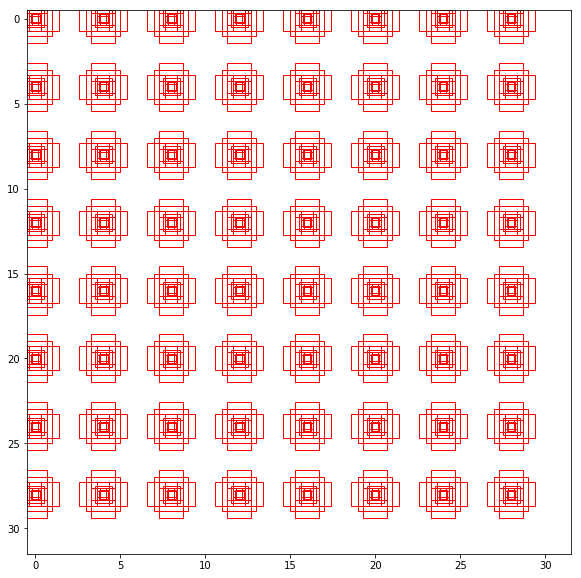

In [44]:
plt.figure(figsize=(10,10))

currentAxis=plt.gca()
for i in range(boxes.shape[0]):
    box = boxes[i]
    rect=patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],edgecolor='r',facecolor='none')
    currentAxis.add_patch(rect)

plt.imshow(img)